In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("Churn_Modelling.csv")

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
X = df.iloc[:,3:13].values
Y = df.iloc[:,13:].values

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
le2 = preprocessing.LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])],
                       remainder="passthrough")

In [39]:
X = ohe.fit_transform(X)
X = X[:,1:]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [56]:
classifier = Sequential()
classifier.add(Dense(6,activation = "relu", input_dim = 11))
classifier.add(Dense(6,activation = "relu"))

classifier.add(Dense(1,activation = "sigmoid"))

classifier.compile(optimizer="adam", loss = "binary_crossentropy",metrics = ['accuracy'])

In [57]:
classifier.fit(x = x_train, y = y_train,epochs=100, validation_data=(x_test, y_test),verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 1ms/step - loss: 0.6235 - accuracy: 0.6884 - val_loss: 0.5430 - val_accuracy: 0.7930
Epoch 2/100
210/210 [==============================] - 0s 929us/step - loss: 0.5081 - accuracy: 0.7976 - val_loss: 0.4850 - val_accuracy: 0.7970
Epoch 3/100
210/210 [==============================] - 0s 934us/step - loss: 0.4649 - accuracy: 0.8051 - val_loss: 0.4545 - val_accuracy: 0.8091
Epoch 4/100
210/210 [==============================] - 0s 996us/step - loss: 0.4438 - accuracy: 0.8091 - val_loss: 0.4382 - val_accuracy: 0.8112
Epoch 5/100
210/210 [==============================] - 0s 922us/step - loss: 0.4295 - accuracy: 0.8118 - val_loss: 0.4231 - val_accuracy: 0.8158
Epoch 6/100
210/210 [==============================] - 0s 911us/step - loss: 0.4160 - accuracy: 0.8203 - val_loss: 0.4077 - val_accuracy: 0.8276
Epoch 7/100
210/210 [==============================] - 0s 919us/step - loss: 0.4017 - accuracy: 0.8273 - val_loss: 0.3929 - val_accu

210/210 [==============================] - 0s 997us/step - loss: 0.3335 - accuracy: 0.8658 - val_loss: 0.3366 - val_accuracy: 0.8567
Epoch 58/100
210/210 [==============================] - 0s 967us/step - loss: 0.3340 - accuracy: 0.8651 - val_loss: 0.3370 - val_accuracy: 0.8555
Epoch 59/100
210/210 [==============================] - 0s 944us/step - loss: 0.3338 - accuracy: 0.8646 - val_loss: 0.3365 - val_accuracy: 0.8561
Epoch 60/100
210/210 [==============================] - 0s 907us/step - loss: 0.3333 - accuracy: 0.8649 - val_loss: 0.3389 - val_accuracy: 0.8536
Epoch 61/100
210/210 [==============================] - 0s 943us/step - loss: 0.3334 - accuracy: 0.8640 - val_loss: 0.3351 - val_accuracy: 0.8573
Epoch 62/100
210/210 [==============================] - 0s 943us/step - loss: 0.3335 - accuracy: 0.8655 - val_loss: 0.3356 - val_accuracy: 0.8573
Epoch 63/100
210/210 [==============================] - 0s 924us/step - loss: 0.3335 - accuracy: 0.8651 - val_loss: 0.3362 - val_accuracy

In [58]:
kayipVerisi = pd.DataFrame(classifier.history.history)

<AxesSubplot:>

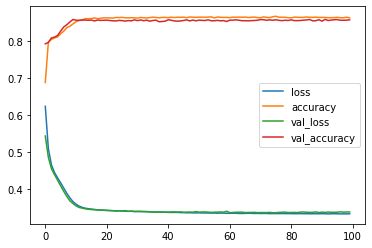

In [59]:
#Epoch fazla verdiğimizden ötürü overfitting yapıyor.
kayipVerisi.plot()

In [60]:
y_pred = classifier.predict(x_test)

In [61]:
y_pred = (y_pred >0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test)